#  Initial Data Exploration

In [1]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
### Include all quantitative features. In addition, 'std_from_poi' and
### 'std_to_poi' are standardized feature (see details below).
features_list = ['poi','salary', 'deferral_payments', 'total_payments',
                 'loan_advances', 'bonus', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses',
                 'exercised_stock_options', 'other', 'long_term_incentive',
                 'restricted_stock', 'director_fees','shared_receipt_with_poi',
                 'std_from_poi','std_to_poi']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers

### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
# Add new features: std_from_poi and std_to_poi by dividing the message
# to/from poi by the total sent or received messages, respectively.
for key in data_dict:
    if (type(data_dict[key]['from_poi_to_this_person']) == int and
        type(data_dict[key]['from_messages']) == int):
        data_dict[key]['std_from_poi'] = \
        (data_dict[key]['from_poi_to_this_person']/
         data_dict[key]['from_messages'])
    else:
        data_dict[key]['std_from_poi'] = 0
    if (type(data_dict[key]['from_this_person_to_poi']) == int and
        type(data_dict[key]['to_messages']) == int):
        data_dict[key]['std_to_poi'] = \
        (data_dict[key]['from_this_person_to_poi']/
         data_dict[key]['to_messages'])
    else:
        data_dict[key]['std_to_poi'] = 0
my_dataset = data_dict
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
# The followings are the major steps in the analysis:
# A. Visualize the data using dimensionality reduction PCA and LDA to gain
#    further insight into the data
# B. Algorithm selection using repeated nested cross validation to choose
#    the algorithm that has highest accuracy
# C. Model selection using repeated cross validation to identify the best
#    hyperparameter values

# The following classification algorithms are used:
# 1. Logistic Regression
# 2. Random Forest Classifier
# 3. KNN Classifier
# 4. Support Vector Classifier
# 5. Neural Network: Multi-layer Perceptron Classifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# For simplicity, rename features as X and labels as y
X = features
y = labels
### First, explore the dataset.
### Identify the total number of data points.
print 'Total number of data points:',np.shape(X)[0]
print 'Total number of features:', np.shape(X)[1]

X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_std,y)
print 'PCA explained_variance_ratio_', pca.explained_variance_ratio_
print 'LDA explained variance:', lda.explained_variance_ratio_

Total number of data points: 145
Total number of features: 17
PCA explained_variance_ratio_ [ 0.77628412  0.07772042]
LDA explained variance: [ 1.]


/Users/Raga/anaconda/envs/enron/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#  Scatterplot Matrix

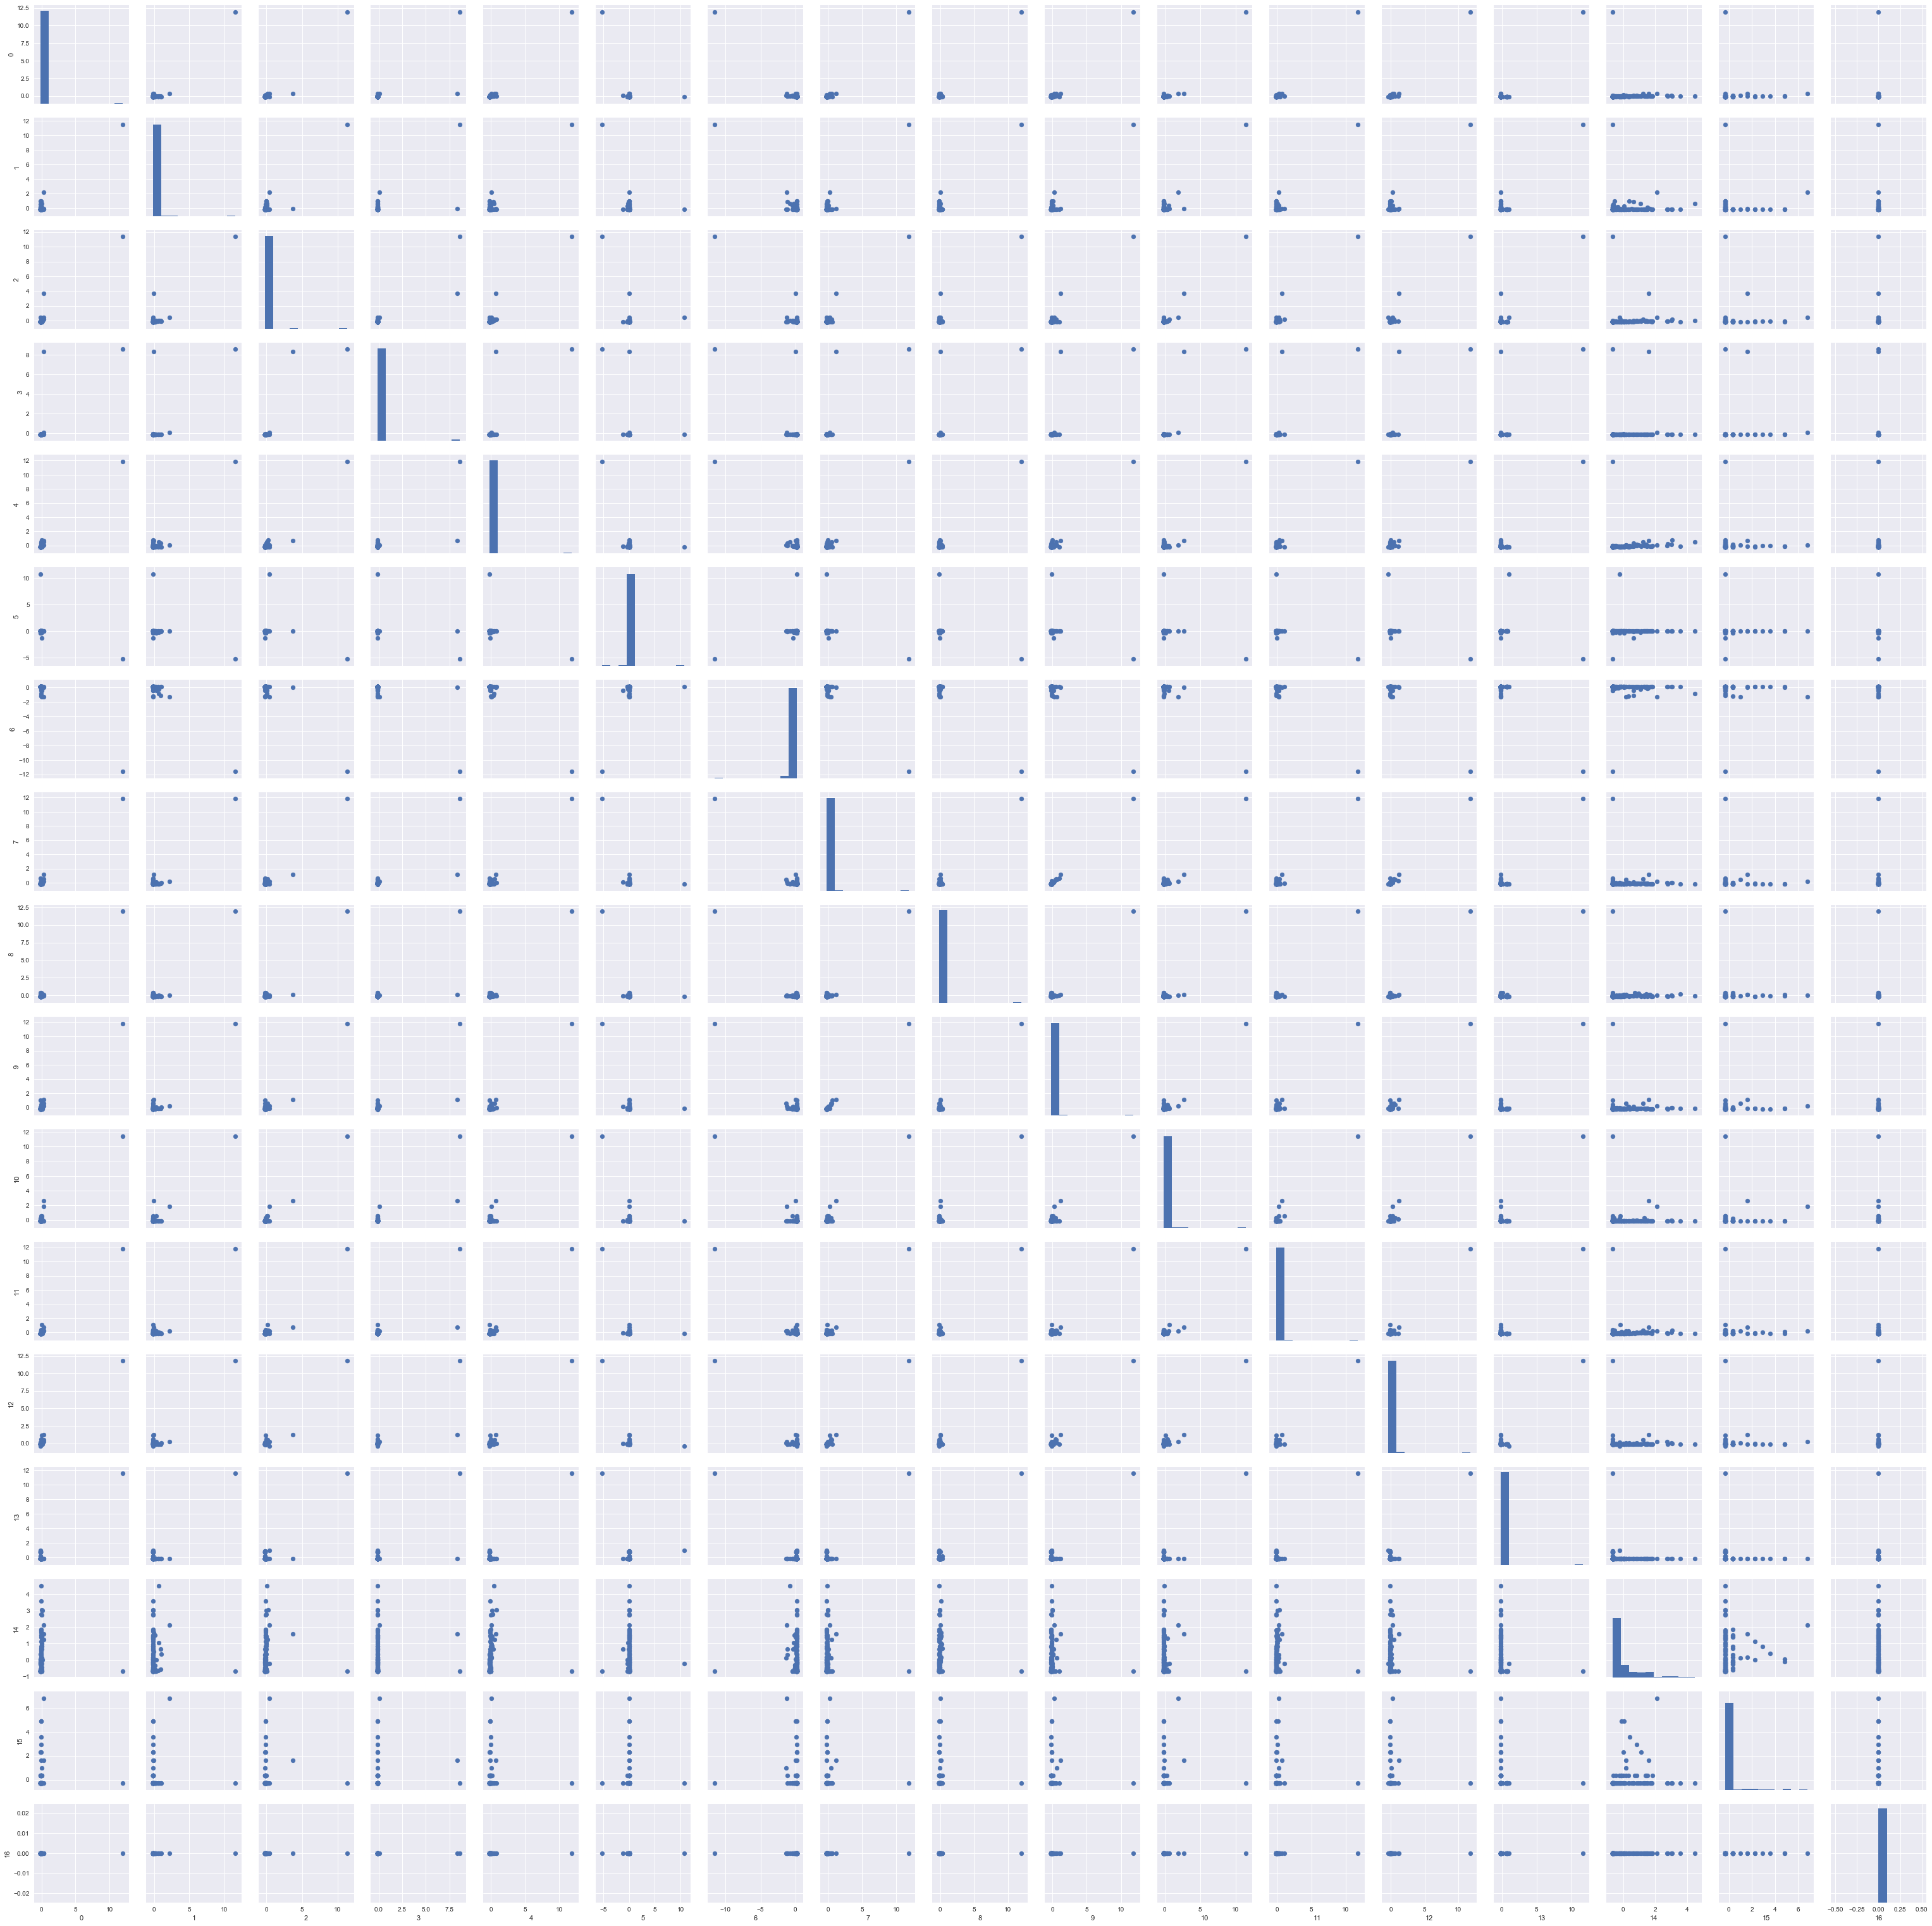

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(X_std)
pg = sns.PairGrid(df)
pg.map_diag(plt.hist)
pg.map_offdiag(plt.scatter)
plt.show()